In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from config import name, data_path

import os 
os.getcwd()

'/home/selezov_su/notebooks/Promics/Panoram'

In [7]:
## Reading metadata
meta = pd.read_csv("Data/meta.csv")[["id", "condition", "acuteness"]]
meta = pd.MultiIndex.from_tuples(list(meta.to_records(index=False)), names=["sample", "condition", "acuteness"])

## Reading proteinGroups.txt from MaxQuant
contaminants = pd.read_csv(data_path + "proteinGroups.txt", sep="\t", low_memory=False, index_col=0) \
            .dropna(subset=["Taxonomy names"], axis=0)

## Set up sample names
columns = ["iBAQ H" + str(i) for i in range(1, 13)] + ["iBAQ P" + str(i) for i in range(1, 13)]

contaminants.index = contaminants.index.map(lambda x: x.split(";")[0])
cons = contaminants.loc[~contaminants["Taxonomy names"].str.contains("Homo")]

cons["Name len"] = cons["Fasta headers"].dropna().map(lambda x: len(x.split()))
cons = cons.loc[cons["Name len"] > 1]

cons["Organism"] = cons["Fasta headers"].map(lambda x: " ".join(" ".join(x.split("OS=")[1:]).split()[:2]))
cons["Protein name"] = cons["Fasta headers"].map(lambda x: ' ' .join(x.split("OS=")[0].split()[1:]))

cons = cons[["Organism", "Protein name", "Sequence coverage [%]"]].sort_values("Organism", ascending=False)#.head(20)

c = cons.copy()
cons = cons.loc[cons["Sequence coverage [%]"] > 10]

coverage = cons\
    .sort_values("Sequence coverage [%]", ascending=False)[['Sequence coverage [%]']] \
    .reset_index().reset_index(names="Protein Coverage Rank").set_index("Protein IDs")

col_names = ["iBAQ H" + str(i) for i in range(1, 13)] + ["iBAQ P" + str(i) for i in range(1, 13)]

idx = pd.MultiIndex.from_frame(pd.DataFrame(list(meta.values)).set_index(0).loc[col_names].reset_index(), names=["sample", "condition", "acuteness"])

heat = contaminants.loc[cons.index][columns]
heat.columns = idx
heat.index = pd.MultiIndex.from_tuples(list(cons.to_records()), names=["uniprot", "protein", "organism", "coverage"])
# heat = cons["Protein name"].loc[heat.index.get_level_values(0)].loc[~heat.index.get_level_values(1).str.contains('Uncharacterized protein')]
heat = heat.loc[heat.index.get_level_values(1) != 'Uncharacterized protein']
heat = heat.loc[heat.sum(1) > 10]
heat

/tmp/ipykernel_1102515/343031464.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons["Name len"] = cons["Fasta headers"].dropna().map(lambda x: len(x.split()))


,,,sample,iBAQ H1,iBAQ H2,iBAQ H3,iBAQ H4,iBAQ H5,iBAQ H6,iBAQ H7,iBAQ H8,iBAQ H9,iBAQ H10,...,iBAQ P3,iBAQ P4,iBAQ P5,iBAQ P6,iBAQ P7,iBAQ P8,iBAQ P9,iBAQ P10,iBAQ P11,iBAQ P12
,,,condition,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,...,Pneumonia,Pneumonia,Pneumonia,Pneumonia,Pneumonia,Pneumonia,Pneumonia,Pneumonia,Pneumonia,Pneumonia
,,,acuteness,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,...,Severe,Mild,Severe,Severe,Mild,Severe,Severe,Mild,Mild,Mild
uniprot,protein,organism,coverage,,,,,,,,,,,,,,,,,,,,,
S2ZR23,Veillonella sp.,NAD-dependent malic enzyme,18.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1667900.0,0.0
S2ZSI6,Veillonella sp.,Methylmalonyl-CoA epimerase,29.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12791000.0,0.0
S2ZQ88,Veillonella sp.,Malate/L-lactate dehydrogenase,39.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2674400.0,0.0,0.0,0.0,38373000.0,0.0
S2ZTF5,Veillonella sp.,Elongation factor Tu,37.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4336500.0,1929400.0,0.0,0.0,22729000.0,0.0
S2ZTW5,Veillonella sp.,Elongation factor P,11.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010500.0,0.0
S3ABU8,Veillonella sp.,Sirohydrochlorin cobaltochelatase,13.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1371200.0,0.0
S3ARN3,Veillonella sp.,Alkyl hydroperoxide reductase C,10.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


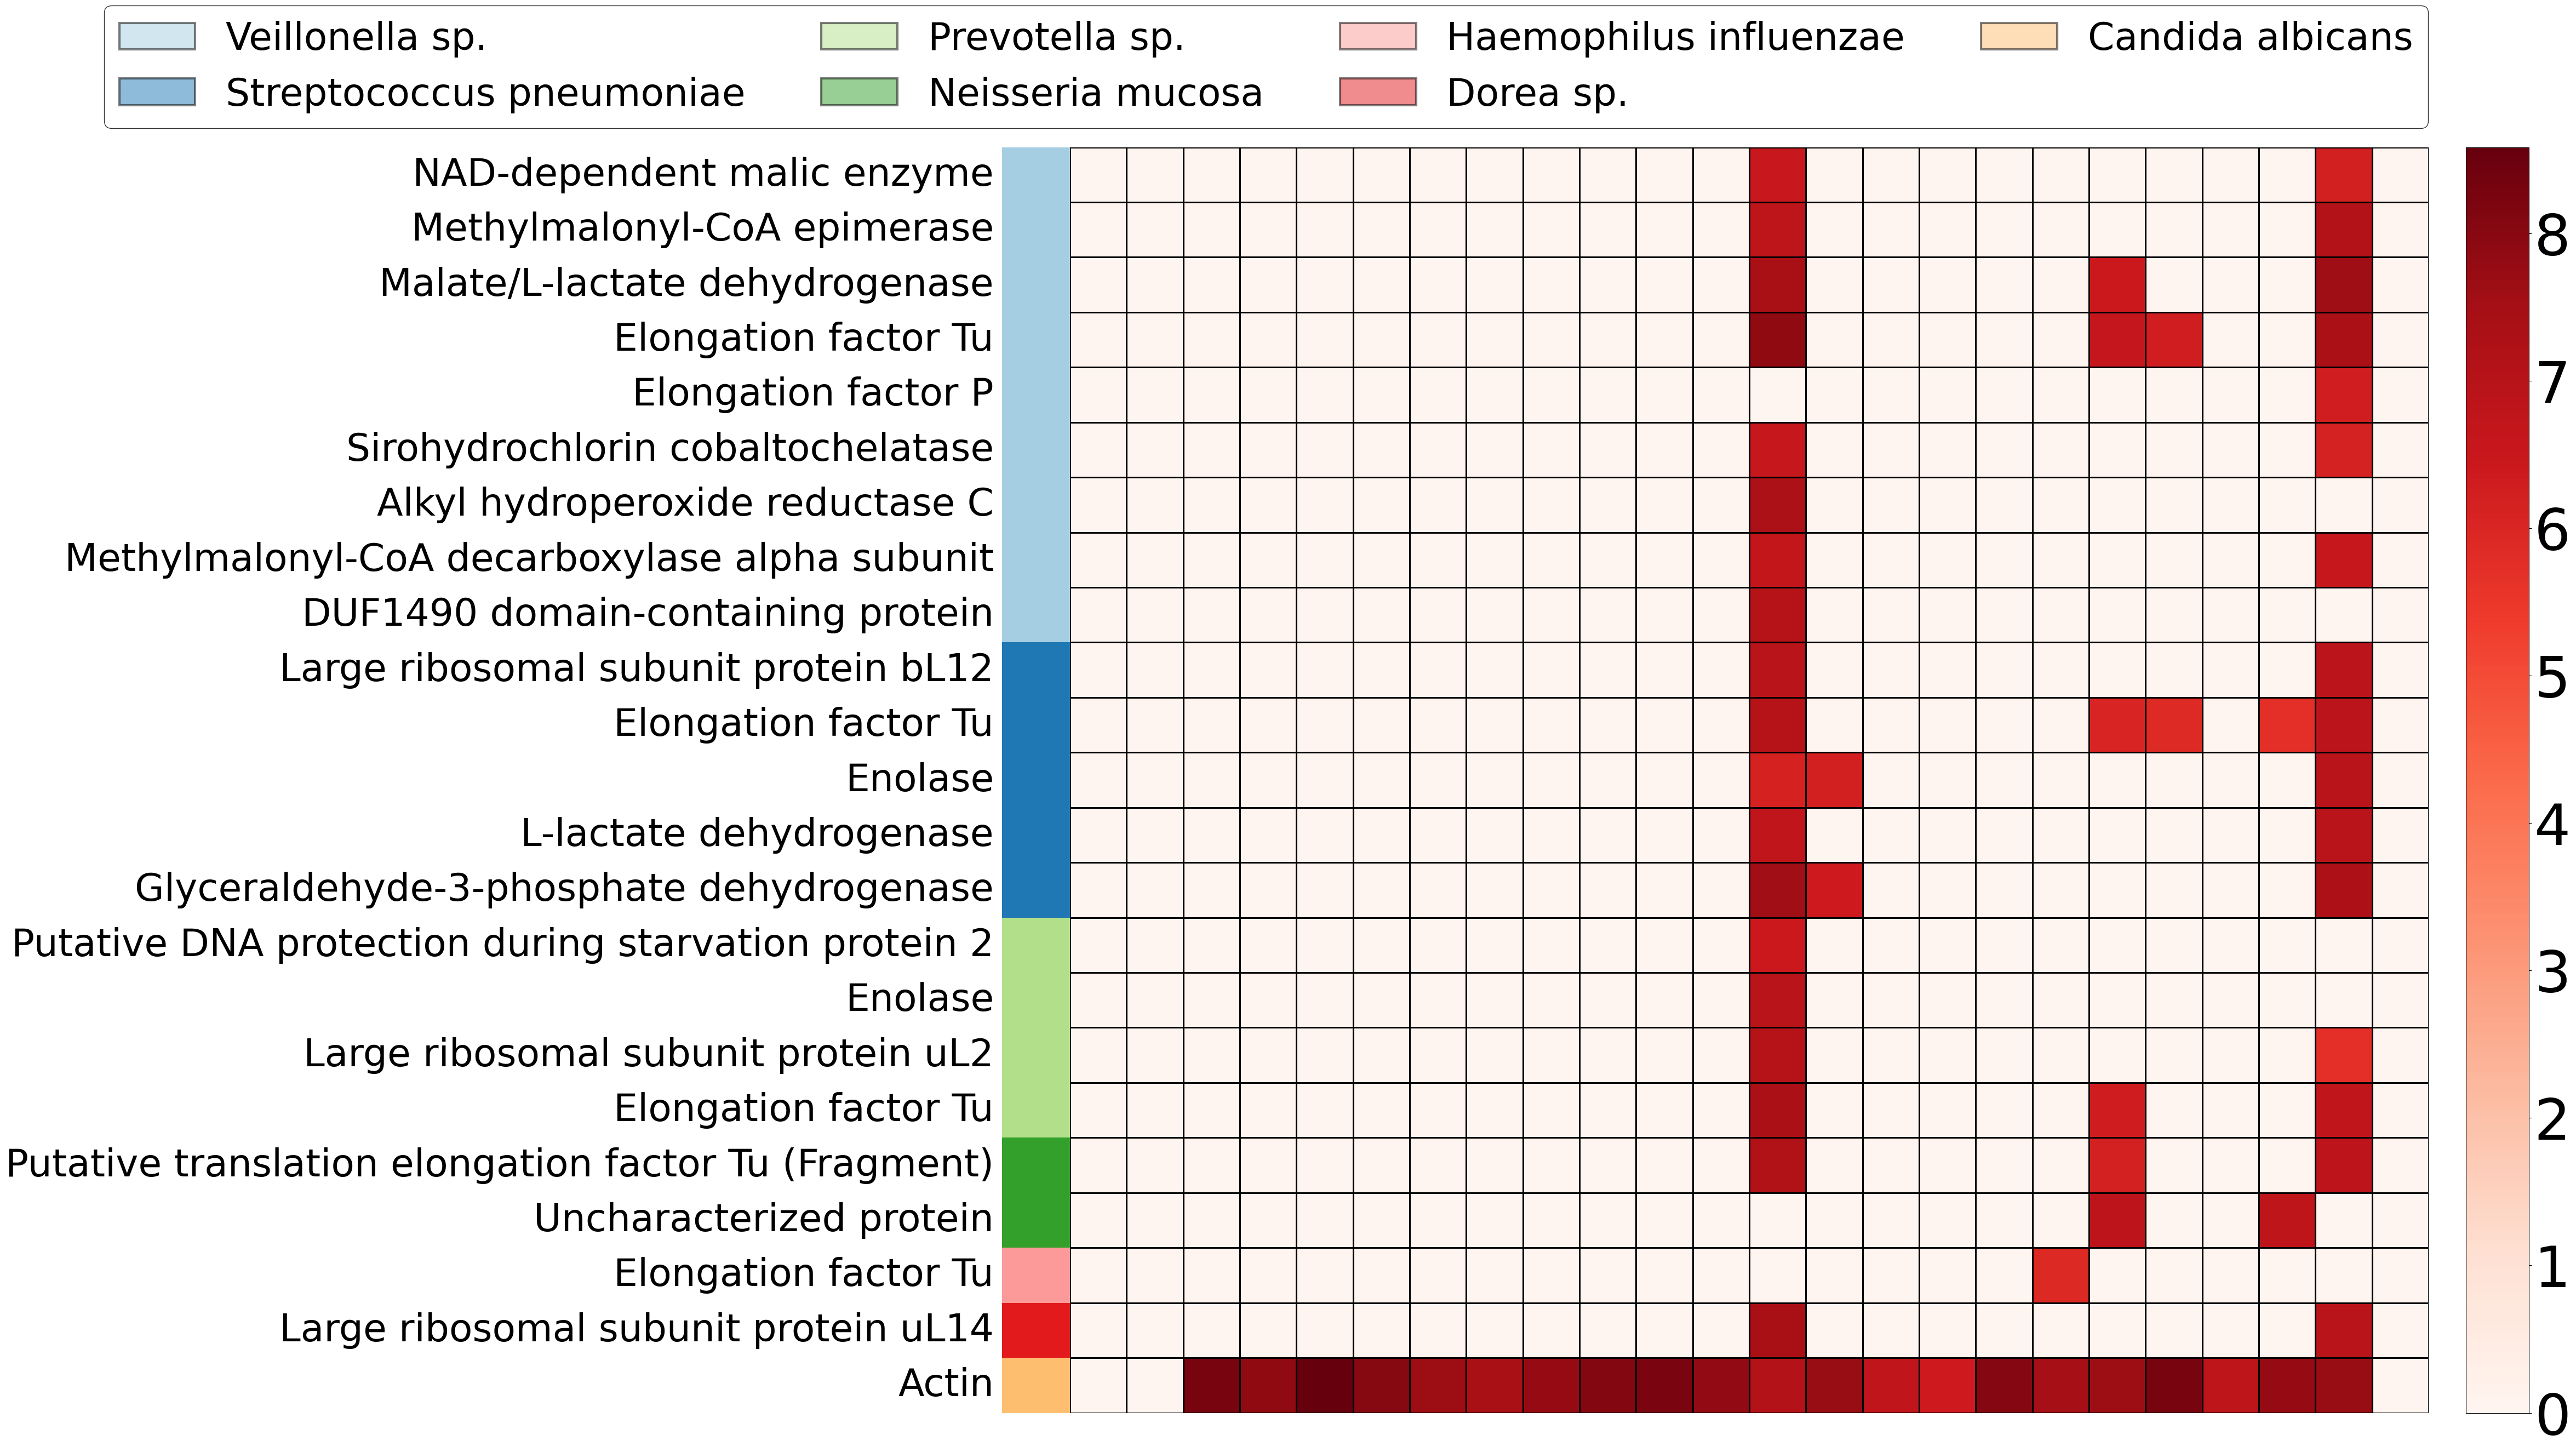

In [8]:
import matplotlib
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(40, 30))


colors = dict()

heatmap = sns.heatmap(
    np.log10(heat.values + 1),
    yticklabels=heat.index.get_level_values(2),
    xticklabels="", #heat.T.index.get_level_values(0).map(lambda x: x.strip("iBAQ ")),
    cmap="Reds",
    linewidth=1,
    linecolor="black",
    cbar=False
    
)
heatmap.tick_params(axis='y', which='major', pad=100, length=0, labelsize=50)
heatmap.tick_params(axis='x', which='major', length=0, labelsize=50)

organism = heat.index.get_level_values(1).drop_duplicates()
colors = matplotlib.cm.Paired(range(len(organism)))

colormap = dict((org, col) for org, col in zip(organism, colors))

row_colors = heat.index.get_level_values(1).map(colormap)

for i, color in enumerate(row_colors):
    heatmap.add_patch(
        plt.Rectangle(
            xy=(-0.05, i), width=0.05, height=1, color=color, lw=0,
                transform=heatmap.get_yaxis_transform(), clip_on=False)
    )

# colorbar
cbar = fig.colorbar(heatmap.get_children()[0], anchor=(-0.25, 0))
cbar.ax.tick_params(labelsize=75) 

heatmap.legend(
    handles=[*[
        mpatches.Patch(facecolor=col, label=org, alpha=0.5, edgecolor="black", lw=3) for org, col in zip(organism, colors)
       
    ]],
    ncol=4,
    bbox_to_anchor=(-0.725, 1),
    loc="lower left",
    facecolor='white', 
    edgecolor="black",
    fontsize=50,
)
fig.savefig("Plots/species_heatmap.png", bbox_inches="tight", dpi=300)

In [11]:
no_homo

,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,Razor + unique peptides,...,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions,Taxonomy IDs,Taxonomy names
Protein IDs,,,,,,,,,,,,,,,,,,,,,
A0A0H2UN89,A0A0H2UN89,1,1,1,NaN,NaN,tr|A0A0H2UN89|A0A0H2UN89_STRPN Uncharacterized...,1,1,1,...,3201,20154;20155;20156;20157,39994;39995;39996;39997,39994,1,NaN,13,NaN,170187,Streptococcus pneumoniae TIGR4
A0A0H2UNF0,A0A0H2UNF0,1,1,1,NaN,NaN,tr|A0A0H2UNF0|A0A0H2UNF0_STRPN Large ribosomal...,1,1,1,...,3508,21898,43450,43450,NaN,NaN,NaN,NaN,170187,Streptococcus pneumoniae TIGR4
A0A0H2UPE6,A0A0H2UPE6,1,1,1,NaN,NaN,tr|A0A0H2UPE6|A0A0H2UPE6_STRPN EfeO-type cupre...,1,1,1,...,472,3164,6367,6367,334;335;336,NaN,33;34;39,NaN,170187,Streptococcus pneumoniae TIGR4
A0A0H2UPG5,A0A0H2UPG5,2,2,2,NaN,NaN,tr|A0A0H2UPG5|A0A0H2UPG5_STRPN Ribosomal prote...,1,2,2,...,1486;2990,9980;19102;19103;19104,19681;37953;37954;37955,19681;37954,NaN,NaN,NaN,NaN,170187,Streptococcus pneumoniae TIGR4
A0A0H2UPJ3,A0A0H2UPJ3,2,2,2,NaN,NaN,tr|A0A0H2UPJ3|A0A0H2UPJ3_STRPN Pyruvate kinase...,1,2,2,...,2662;6468,16920;42718,33831;33832;87928,33831;87928,NaN,NaN,NaN,NaN,170187,Streptococcus pneumoniae TIGR4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S3ACP6,S3ACP6,2,2,2,NaN,NaN,tr|S3ACP6|S3ACP6_9FIRM Elongation factor Ts OS...,1,2,2,...,2380;5217,15427;15428;33717,30984;30985;68245,30985;68245,NaN,NaN,NaN,NaN,1203593,Veillonella sp. HPA0037
S3ARN3,S3ARN3,2,2,2,NaN,NaN,tr|S3ARN3|S3ARN3_9FIRM Alkyl hydroperoxide red...,1,2,2,...,5189;6076,33546;33547;39955,67898;67899;67900;81631,67898;81631,NaN,NaN,NaN,NaN,1203593,Veillonella sp. HPA0037
S3ARX6,S3ARX6,1,1,1,NaN,NaN,tr|S3ARX6|S3ARX6_9FIRM Succinate dehydrogenase...,1,1,1,...,6385,42047;42048,86491;86492,86492,NaN,NaN,NaN,NaN,1203593,Veillonella sp. HPA0037


In [10]:
no_homo = contaminants.loc[~contaminants["Taxonomy names"].str.contains("Homo")]
no_homo.loc[~no_homo["Taxonomy names"].str.contains(";")]["Taxonomy names"].map(lambda x: " ".join(x.split()[:2])).value_counts(normalize=True)

Candida albicans            0.185185
Veillonella sp.             0.169312
Prevotella sp.              0.153439
Dorea sp.                   0.121693
Streptococcus pneumoniae    0.116402
Haemophilus influenzae      0.084656
Elaeagnaceae                0.084656
Moraxella atlantae          0.042328
Mycoplasma pneumoniae       0.042328
Name: Taxonomy names, dtype: float64

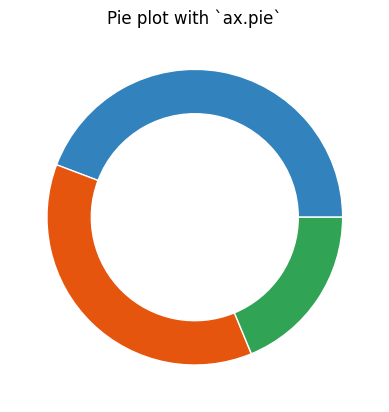

In [106]:
fig, ax = plt.subplots()


vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#        wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

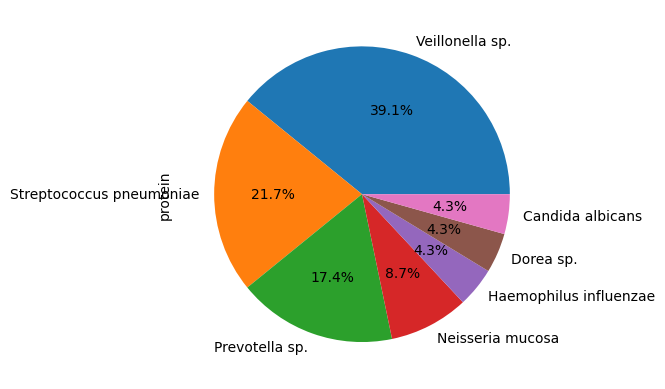

In [13]:
pie = heat.index.get_level_values(1).value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

pie.figure.savefig("Plots/bacterias.png", bbox_inches="tight", dpi=200)

In [6]:
cons[["Protein name", "Organism", "Sequence coverage [%]"]].sort_values("Sequence coverage [%]", ascending=False)["Organism"].value_counts()

Veillonella sp.             11
Streptococcus pneumoniae     6
Candida albicans             6
Prevotella sp.               5
Neisseria mucosa             4
Dorea sp.                    1
Haemophilus influenzae       1
Mycoplasma pneumoniae        1
Name: Organism, dtype: int64

In [9]:
coverage

,Protein Coverage Rank,Sequence coverage [%]
Protein IDs,,
S2ZQ88,0,39.8
S2ZTF5,1,37.5
P64030,2,32.4
A0A0H2US80,3,31.0
D2ZZM8,4,29.5
S2ZSI6,5,29.3
A0A0H2UN89,6,25.8
S3A0C2,7,22.1
D2ZW91,8,22.0


In [15]:
str.split(";")

[';']

In [7]:
cons[["Protein name", "Organism", "Sequence coverage [%]"]].sort_values("Sequence coverage [%]", ascending=False).head(20).to_excel("cont_protes.xlsx")

In [14]:
tissue = pd.read_csv("normal_tissue.tsv", sep="\t").iloc[:-1]

In [12]:
tissue.Tissue.value_counts().head(20)

skin 1             47357
testis             42963
cerebellum         39896
cerebral cortex    38799
colon              31197
breast             28628
tonsil             28627
lung               22680
kidney             22605
appendix           22085
skin 2             21400
soft tissue 1      20662
hippocampus        19370
soft tissue 2      19355
endometrium 1      19342
placenta           19329
endometrium 2      19309
liver              19305
spleen             19300
caudate            19250
Name: Tissue, dtype: int64

In [19]:
tis = tissue[["Tissue", "Gene name"]].drop_duplicates()

In [21]:
tis_set = dict((t, tis.loc[tis.Tissue == t]["Gene name"].to_list()) for t in tis["Tissue"].drop_duplicates())

In [ ]:
import gseapy as gp
# go_mf = gp.get_library(name='GO_Cellular_Component_2021', organism='Human')


# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=result["To"].to_list(), # or "./tests/data/gene_list.txt",
    gene_sets=tis_set,
    organism='human', # don't forget to set organism to the one you desired!␣˓→e.g. Yeast
    # background=None,
    outdir=None, # don't write to disk
    cutoff=0.05
)

enr.results


In [130]:
g = sns.relplot(
    data= heat.apply(np.log10),
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

ValueError: Could not interpret value `level_0` for `x`. An entry with this name does not appear in `data`.

In [131]:
heat

,iBAQ H1,iBAQ H2,iBAQ H3,iBAQ H4,iBAQ H5,iBAQ H6,iBAQ H7,iBAQ H8,iBAQ H9,iBAQ H10,...,iBAQ P3,iBAQ P4,iBAQ P5,iBAQ P6,iBAQ P7,iBAQ P8,iBAQ P9,iBAQ P10,iBAQ P11,iBAQ P12
Protein IDs,,,,,,,,,,,,,,,,,,,,,
S2ZR23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1667900.0,0.0
S2ZSI6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12791000.0,0.0
S2ZS81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S2ZQ88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2674400.0,0.0,0.0,0.0,38373000.0,0.0
S2ZTF5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4336500.0,1929400.0,0.0,0.0,22729000.0,0.0
S2ZTW5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010500.0,0.0
S3ACD1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S3ABU8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1371200.0,0.0
S3ARN3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
met = pd.read_excel("../../smears_meta.xlsx")

met.id = met.id.map(lambda x: "iBAQ " + x)
met.set_index("id", inplace=True)

met["condition"] = met.index.map(lambda x: "Healthy" if x.find("H") > -1 else "Pneumonia")
met["acuteness"] = met.apply(lambda x: "Healthy" if x.condition == "Healthy" else ("Severe" if x.hosp_long > 10 else "Mild"), axis=1)

met[["condition", "acuteness"]].reset_index().to_csv("Data/meta.csv", index=False)

met.apply(lambda x: "Healthy" if x.condition == "Healthy" else ("Severe" if x.hosp_long > 10 else "Mild"), axis=1)

met["virus_ct"] = met[["Adenovirus", "Parainfluenza", "RSV", "COVID"]].mean(1)
met["bacter_ct"] = met[["Pneumoniae", "Streptococcus"]].mean(1)

met = met[["sex", "age", "condition", "acuteness", "virus_ct", "bacter_ct"]]

met["virus_infection_intensity"] = met["virus_ct"].map(lambda x: np.nan if pd.isna(x) else "Low" if x > met["virus_ct"].median() else "High")
met["bacterial_infection_intensity"] = met["bacter_ct"].map(lambda x: np.nan if pd.isna(x) else "Low" if x > met["bacter_ct"].median() else "High")

met[["condition", "virus_infection_intensity", "bacterial_infection_intensity"]] = met[["condition", "virus_infection_intensity", "bacterial_infection_intensity"]].apply(lambda x: "Healthy" if x["condition"] == "Healthy" else x, axis=1)

In [103]:
met[["sex", "age", "condition", "acuteness", "virus_ct", "bacter_ct", "virus_infection_intensity", "bacterial_infection_intensity"]].to_csv("Data/sample_params.csv", index=True)

In [36]:
values = pd.read_csv("Data/smears_imputed.csv", index_col=0, header=[0, 1, 2]).T.astype(int)
metadata = values.reset_index().set_index("Sample")[["Condition", "Acuteness"]]
